#### 정규화하지 않는 데이터로 모델링

In [19]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [20]:
df_X = read_data('fb-scaling-X-2')
df_y = read_data('fb-scaling-y-2')

In [21]:
df_X.drop(columns=['pole_cnts'], axis=1, inplace=True)
training_columns = df_X.columns

In [22]:
training_columns[training_columns.str.startswith('pole_shape')]

Index(['pole_shape_G', 'pole_shape_O', 'pole_shape_V'], dtype='object')

In [23]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

In [24]:
SEED = 123
ml_models = {
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [25]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.242e+15, tolerance: 5.014e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.599168, MAPE: 15.305908, MSE: 4349409537361.976074, RMSE: 2085523.804075, MAE: 1092301.611745
`LASSO` object has no attribute `feature_importances_`


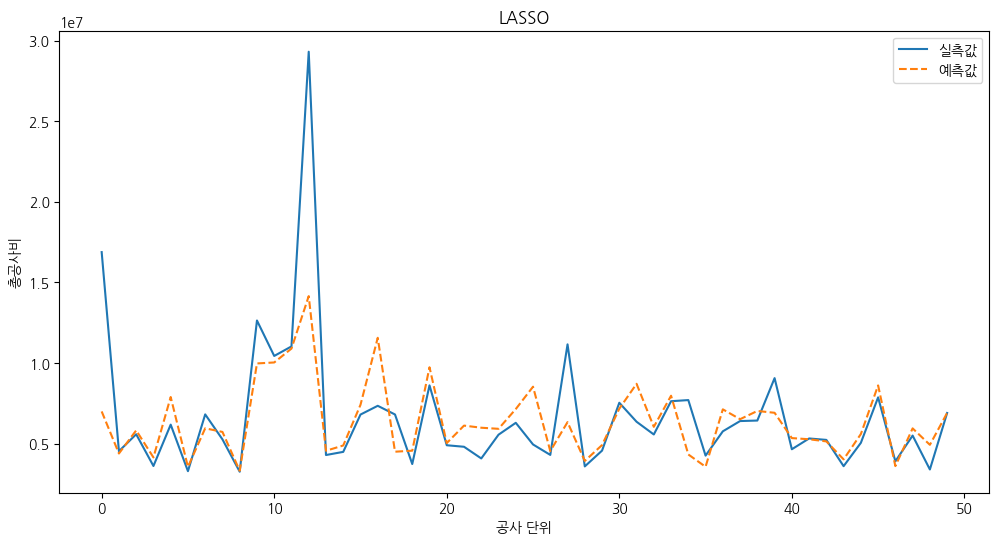

Evaluation: RIDGE
R2_SCORE: 0.599658, MAPE: 15.286015, MSE: 4344087113681.015137, RMSE: 2084247.373437, MAE: 1091328.644458
`RIDGE` object has no attribute `feature_importances_`


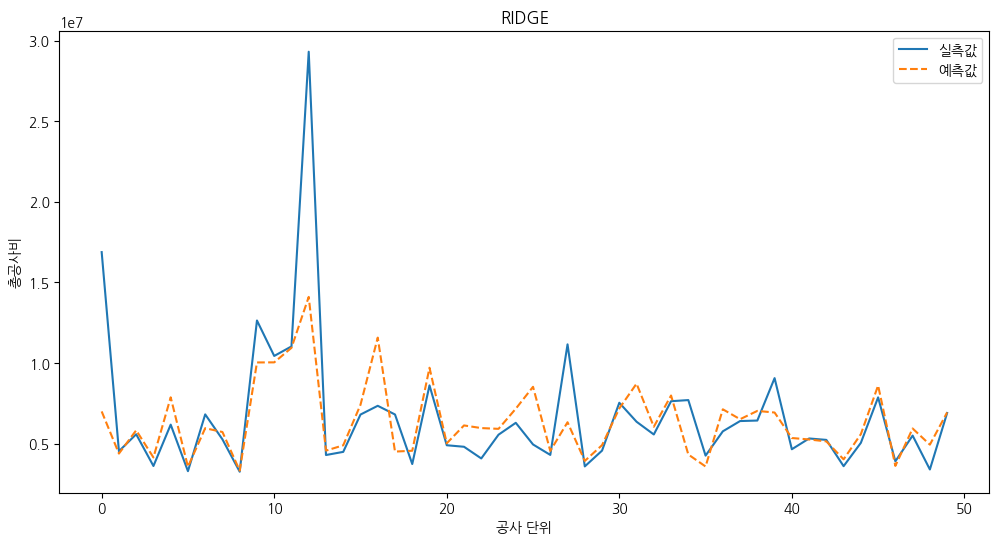

Evaluation: KNR
R2_SCORE: 0.518839, MAPE: 17.113178, MSE: 5221048549973.027344, RMSE: 2284961.389165, MAE: 1241221.140724
`KNR` object has no attribute `feature_importances_`


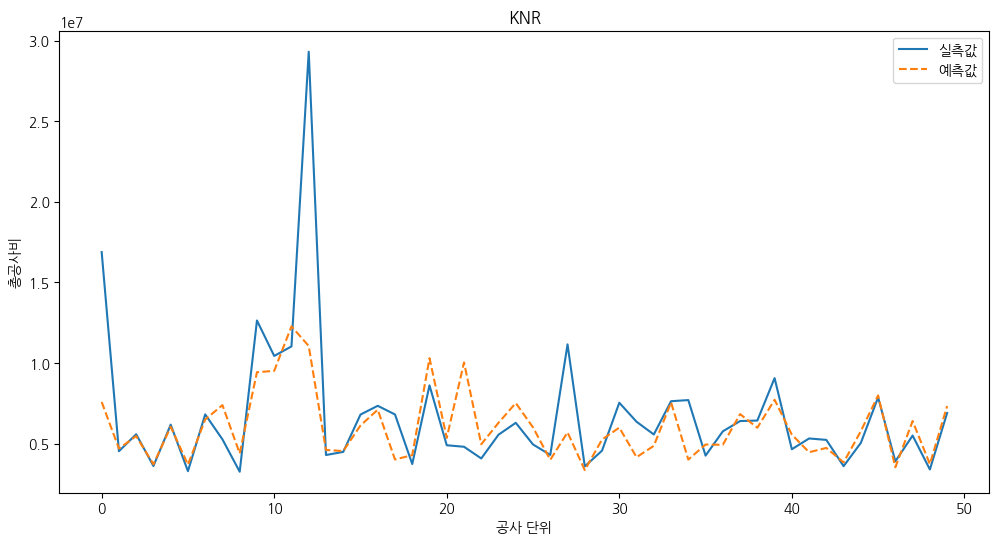

Evaluation: DTR
R2_SCORE: -0.009078, MAPE: 24.756696, MSE: 10949442233416.632812, RMSE: 3308994.142246, MAE: 1671970.959276


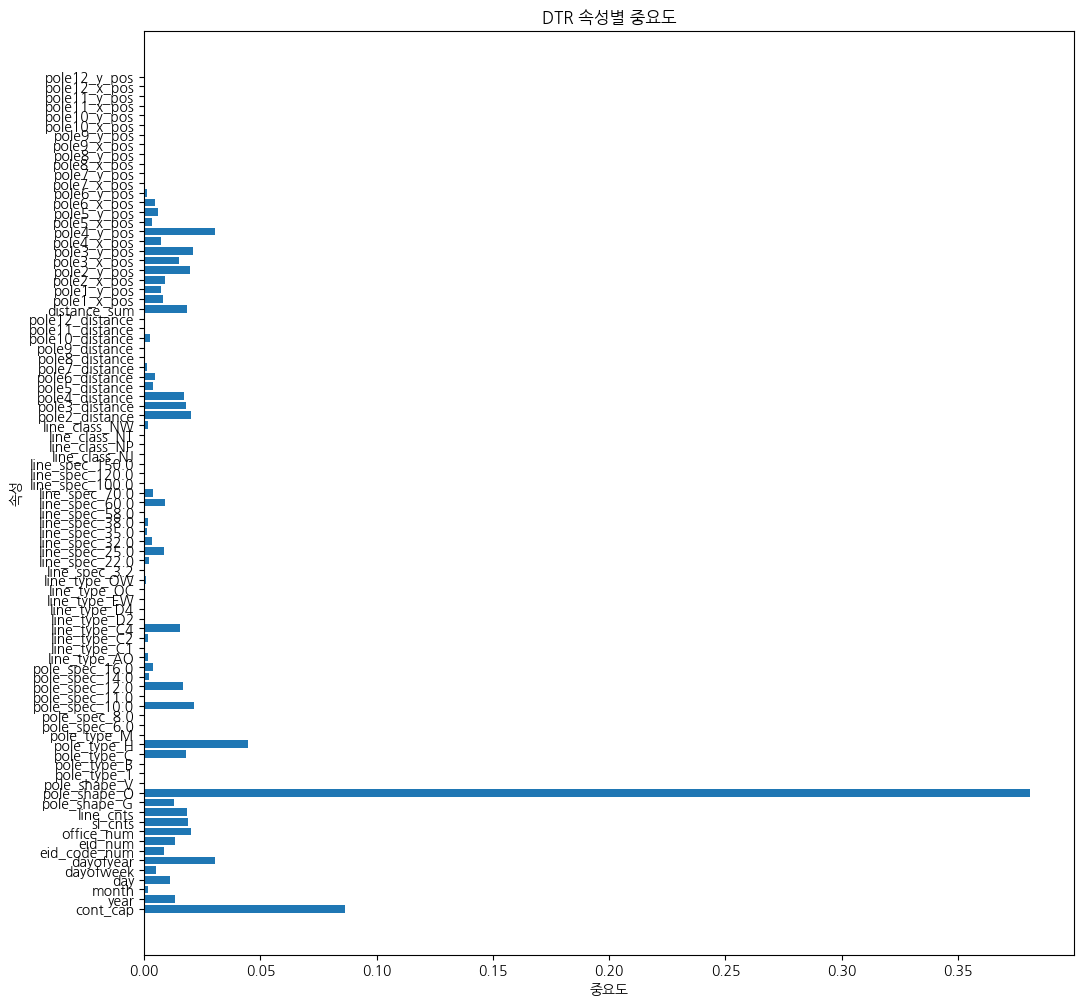

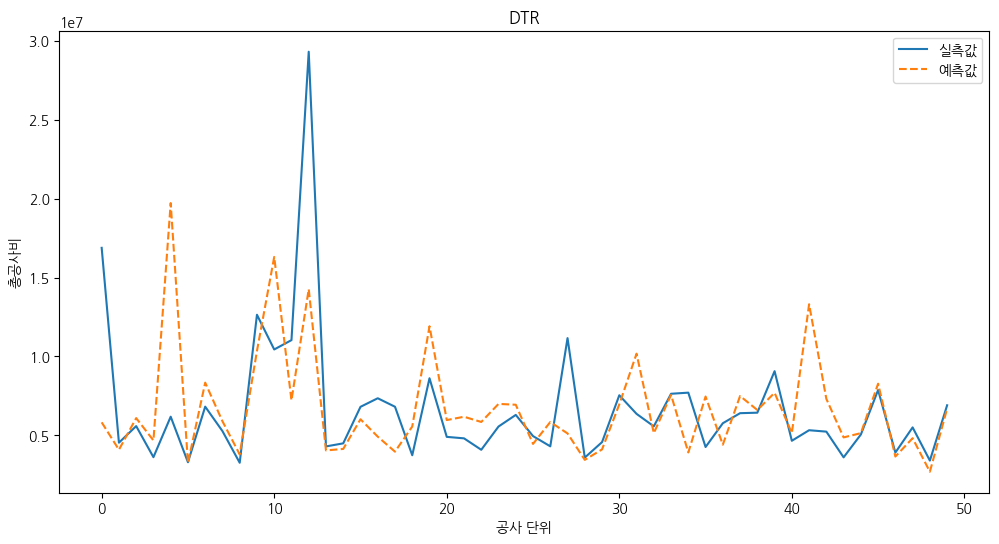

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.570119, MAPE: 16.725984, MSE: 4664614506482.852539, RMSE: 2159771.864453, MAE: 1154000.659310


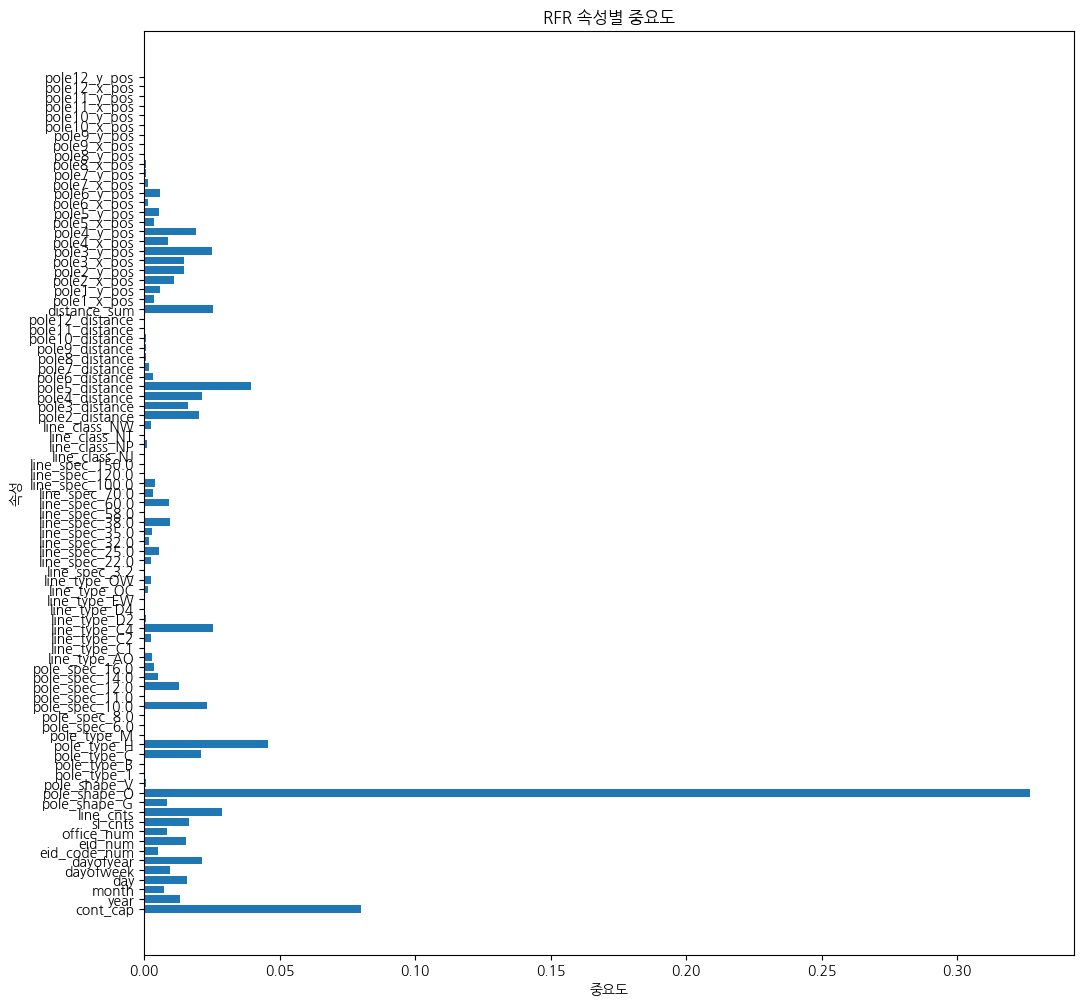

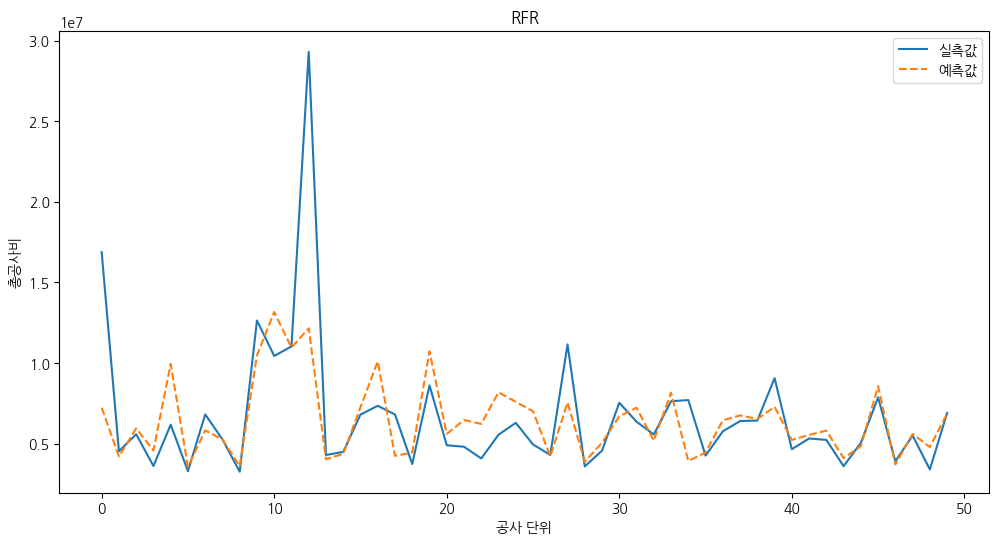

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.616602, MAPE: 15.229343, MSE: 4160226930050.270020, RMSE: 2039663.435484, MAE: 1069395.401334


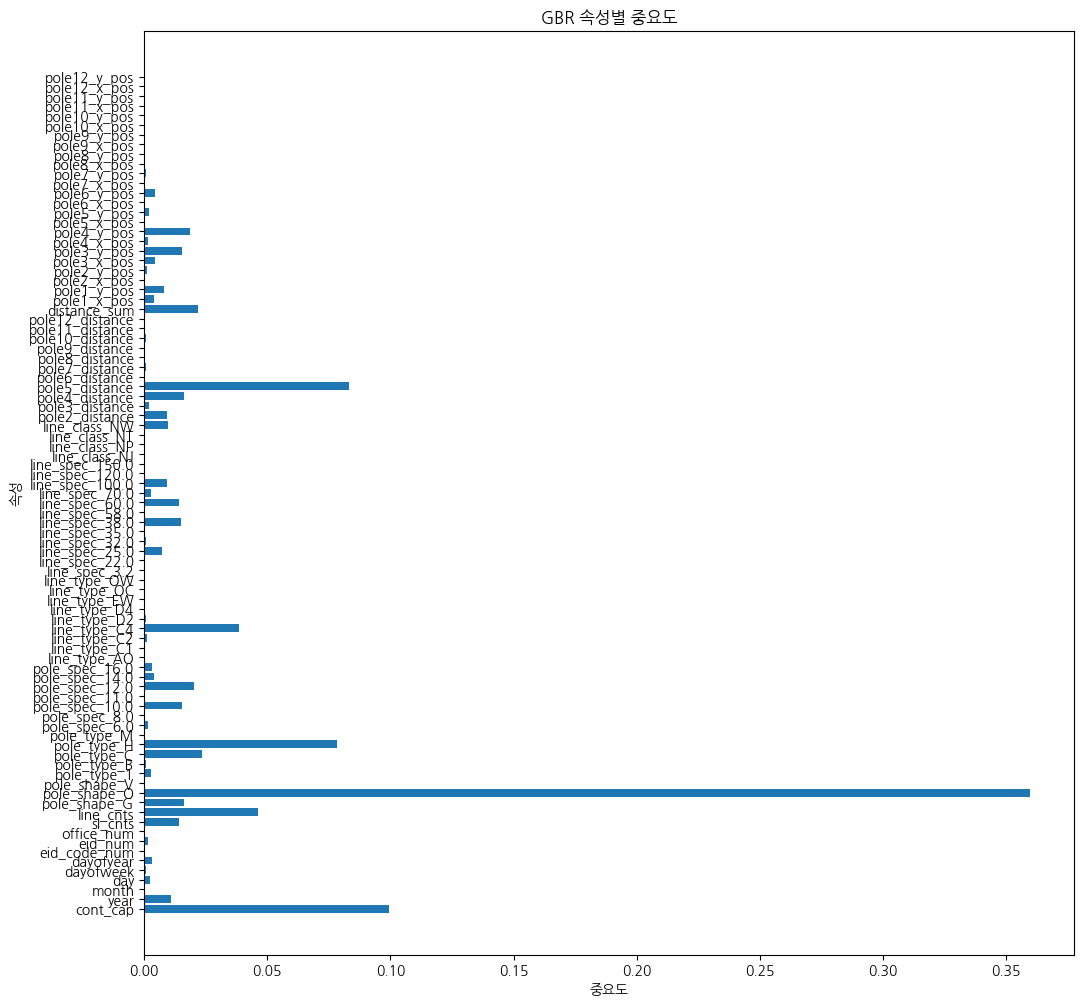

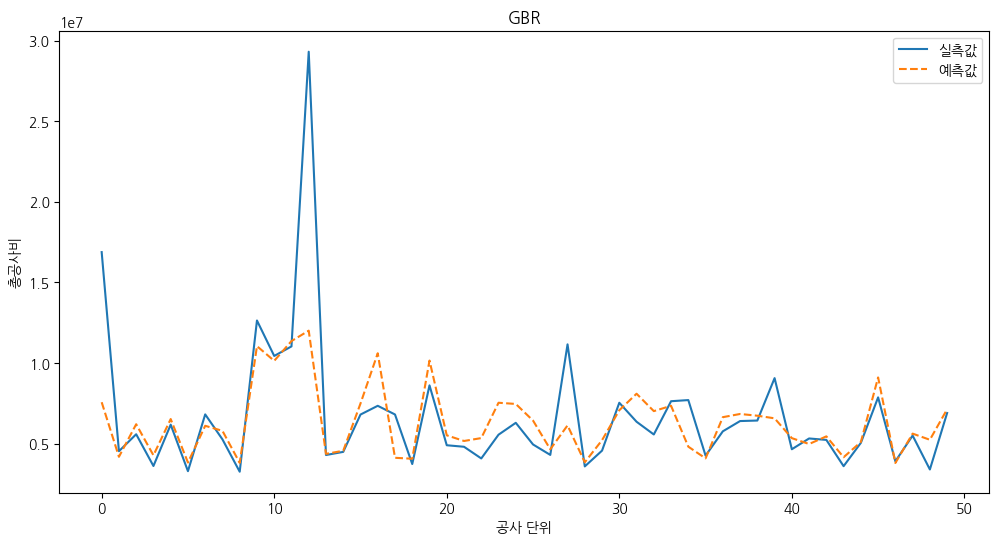

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.573e+14, tolerance: 5.014e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: EN
R2_SCORE: 0.612830, MAPE: 15.585819, MSE: 4201158883113.126465, RMSE: 2049672.872220, MAE: 1096191.526939
`EN` object has no attribute `feature_importances_`


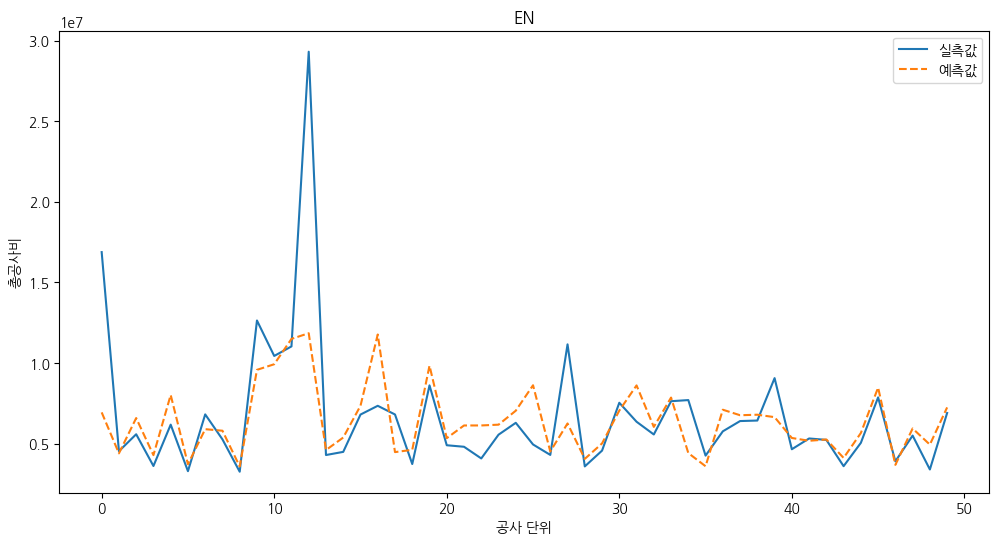

Evaluation: XGR
R2_SCORE: -0.018958, MAPE: 33.975398, MSE: 11056659186549.076172, RMSE: 3325155.513138, MAE: 2381964.045814


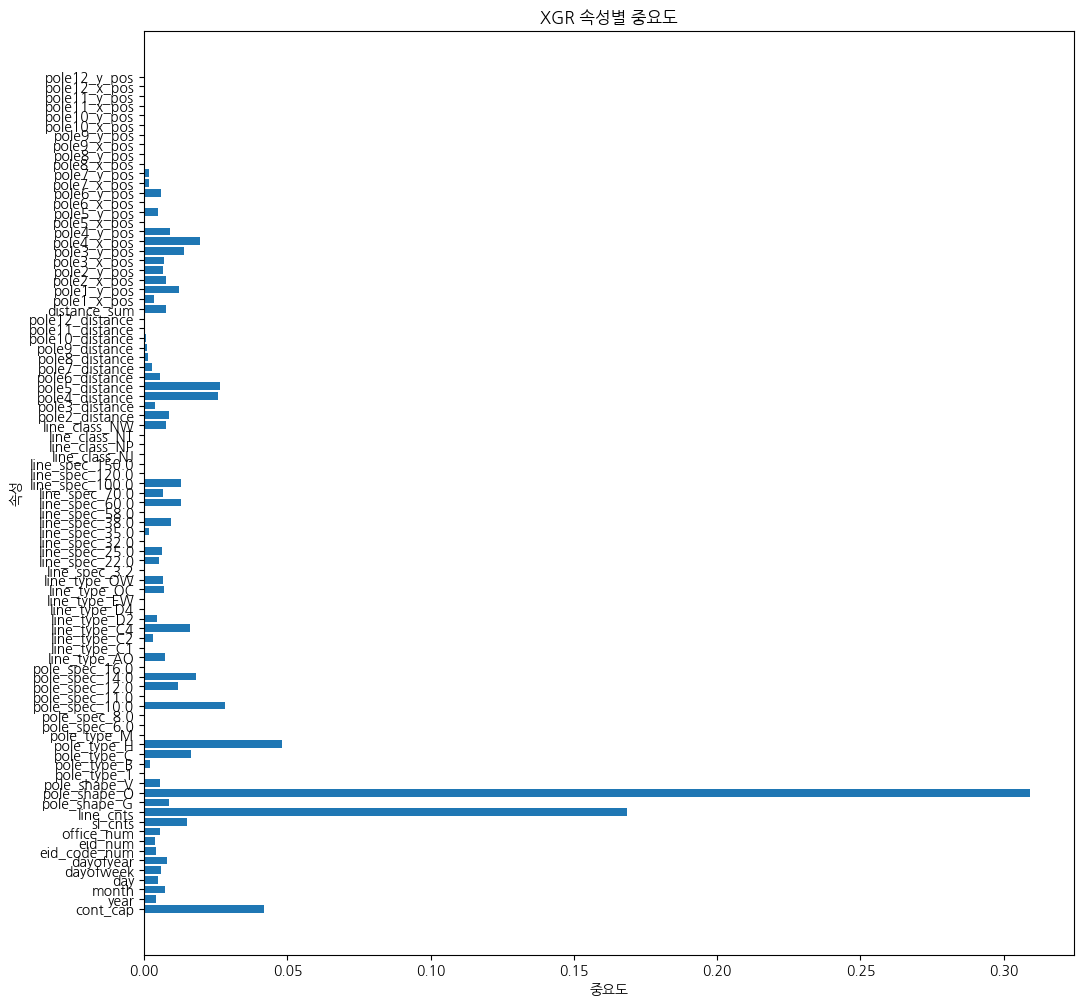

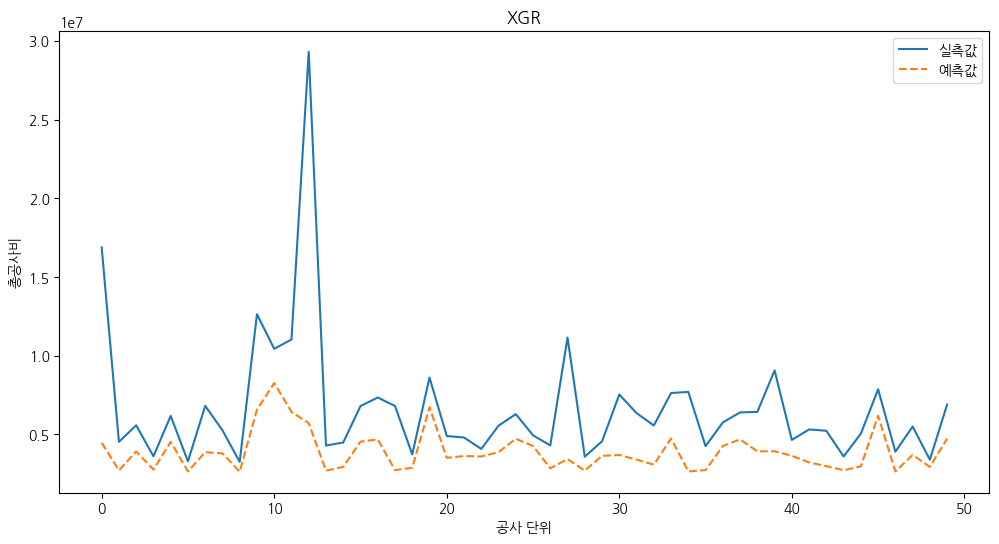

In [26]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [27]:
df_evaluation

,r2score,mape,mse,rmse,mae
LASSO,0.599168,0.153059,4.349410e+12,2.085524e+06,1.092302e+06
RIDGE,0.599658,0.152860,4.344087e+12,2.084247e+06,1.091329e+06
KNR,0.518839,0.171132,5.221049e+12,2.284961e+06,1.241221e+06
DTR,-0.009078,0.247567,1.094944e+13,3.308994e+06,1.671971e+06
RFR,0.570119,0.167260,4.664615e+12,2.159772e+06,1.154001e+06
GBR,0.616602,0.152293,4.160227e+12,2.039663e+06,1.069395e+06
EN,0.612830,0.155858,4.201159e+12,2.049673e+06,1.096192e+06
XGR,-0.018958,0.339754,1.105666e+13,3.325156e+06,2.381964e+06
